# Laboratorio 11
## Esercizio 11.2
Per ottenere il fit della funzione $f(x)=4-3x-2x^2+3x^3$ indago possibili combinazioni di numero di hidden layer, numero di neuroni, funzione di attivazione, ottimizzatore e funzione di costo. Mi concentro su dati generati con un errore gaussiano $\sigma=0.2$. Il dataset di training ha $n_{training} = 700$ punti, il dataset di test ha $n_{valid}=50$.

In [38]:
# target parameters of f(x) = a*x**3 + b*x**2 + c*x + d
a = 3
b = -2
c = -3
d = 4
def polinomial3(x, sigma):
    return np.random.normal(a*x**3 + b*x**2 + c*x + d, sigma)

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 700)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = polinomial3(x_train,sigma) # actual measures from which we want to guess regression parameters
y_valid = polinomial3(x_valid, sigma)

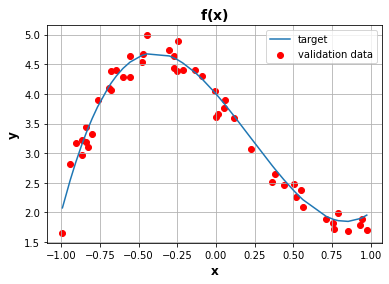

In [39]:
# plot validation and target dataset
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

plt.title('$\mathbf{f(x)}$', fontsize = 14, fontweight = 'bold')
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.xlabel('x', fontsize = 12, fontweight = 'bold')
plt.ylabel('y', fontsize = 12, fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

Genero una prima rete neurale caratterizzata da un unico hidden layer e svolgo una grid search sul numero di neuroni ($n_{neurons}\in[5,50]$) e sulla funzione di attivazione (*tanh, relu, sigmoid, selu*). Come ottimizzatore ho utilizzato *sgd* e come funzione di costo *mse*. Ho svolto $n_{epochs}=100$ epoche.

In [40]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# compile the model choosing optimizer, loss and metrics objects
#model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

def NN_model(inputsize,n_layers,n_neuron,activation,optimizer,loss):
    model=tf.keras.Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation=activation,input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation=activation))
    model.add(Dense(1))
    model.compile(loss=loss,optimizer=optimizer,metrics=['mse'])
    return model

# Define tunable parameters"
n_layers = 1                                  #Define number of hidden layers in the model
n_neuron = np.linspace(5,50,10)                #Define number of neurons per layer
epochs = 100                                  #Number of reiterations over the input data
activation = ["tanh","relu","sigmoid","selu"]
loss = "mse"
optimizer = "sgd"


history = []

Train_loss=np.zeros((len(n_neuron),len(activation)))      #Define matrices to store accuracy scores as a function
Test_loss=np.zeros((len(n_neuron),len(activation)))       #of n_epochs and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    row = []
    for j in range(len(activation)):      #accuracy scores 
        DNN_model=NN_model(1,n_layers,n_neuron[i],activation[j],optimizer,loss)
        earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

        row.append(DNN_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          callbacks=[earlystop]))
        
        Train_loss[i,j]=DNN_model.evaluate(x_train,y_train)[0]
        Test_loss[i,j]=DNN_model.evaluate(x_valid,y_valid)[0]
    history.append(row)

Epoch 1/100
22/22 [==============================] - 0s 7ms/step - loss: 5.1073 - mse: 5.1073 - val_loss: 1.3394 - val_mse: 1.3394
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7676 - mse: 0.7676 - val_loss: 0.5424 - val_mse: 0.5424
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4464 - mse: 0.4464 - val_loss: 0.4467 - val_mse: 0.4467
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.4160 - val_mse: 0.4160
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3539 - mse: 0.3539 - val_loss: 0.3988 - val_mse: 0.3988
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3393 - mse: 0.3393 - val_loss: 0.3871 - val_mse: 0.3871
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3275 - mse: 0.3275 - val_loss: 0.3786 - val_mse: 0.3786
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3183 - m

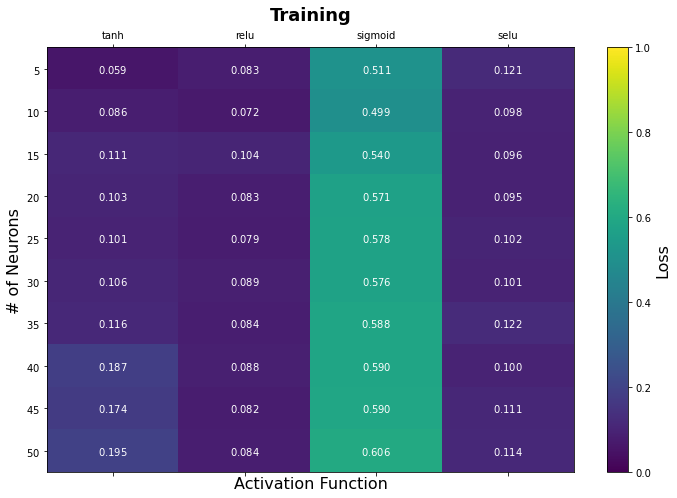

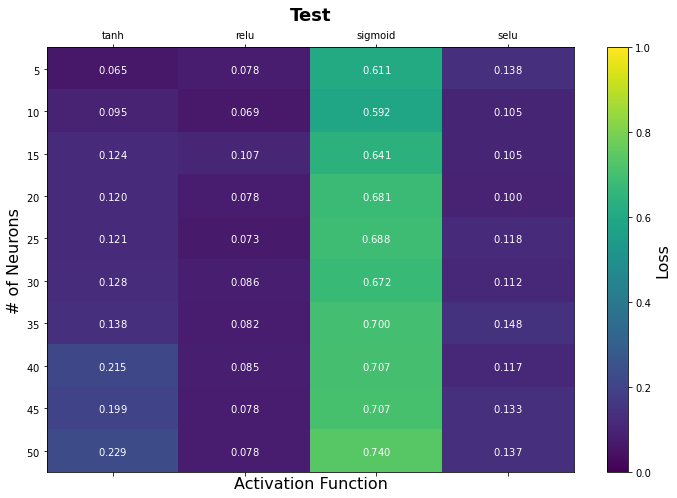

In [41]:
def plot_data_neur_activ(x,y,data,title=None):

    # plot results
    fontsize=16    
    fig, ax = plt.subplots(figsize = (10,7))
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1, 
                     aspect = "auto", cmap="viridis")
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('Loss',rotation=90,fontsize=fontsize)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.3f}$".format(data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center', 
                    color = "white"
                   )

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str("${0:.0f}$".format(i)) for i in y]
    
    ax.set_yticks(np.linspace(0,9,len(y)))
    
    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(y)
    
    ax.set_xlabel('Activation Function',fontsize=fontsize)
    ax.set_ylabel('# of Neurons',fontsize=fontsize)
    if title is not None:
        ax.set_title(title, fontsize=fontsize+2,fontweight='bold')
        
    plt.tight_layout()
    plt.show()

plot_data_neur_activ(activation,n_neuron,Train_loss, 'Training')
plot_data_neur_activ(activation,n_neuron,Test_loss, 'Test')

La funzione di attivazione che ha dato i risultati migliori nel dataset di test è la *relu*, nonostante il risultato migliore ottenuto sul dataset di test sia per $n_{neurons}=5$ e *tanh*. Procedo aumentando il numero di epoche per quest'ultimo:

In [43]:
DNN_model = NN_model(1,n_layers,5,"tanh",optimizer,loss)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta=0, patience=100, mode='auto')
best_history = DNN_model.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=200,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss = DNN_model.evaluate(x_train,y_train)[0]
test_loss =DNN_model.evaluate(x_valid,y_valid)[0]

Epoch 1/200
22/22 [==============================] - 0s 8ms/step - loss: 4.1733 - mse: 4.1733 - val_loss: 0.8502 - val_mse: 0.8502
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.4751 - val_mse: 0.4751
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.4376 - val_mse: 0.4376
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3722 - mse: 0.3722 - val_loss: 0.4251 - val_mse: 0.4251
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3589 - mse: 0.3589 - val_loss: 0.4139 - val_mse: 0.4139
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3494 - mse: 0.3494 - val_loss: 0.4031 - val_mse: 0.4031
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3423 - mse: 0.3423 - val_loss: 0.3957 - val_mse: 0.3957
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3350 - m

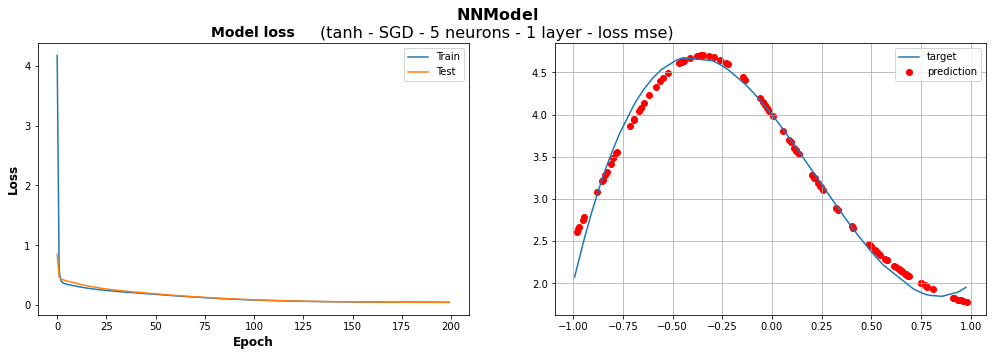

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("$\mathbf{NN Model}$\n(tanh - SGD - 5 neurons - 1 layer - loss mse)", fontsize=16)

ax[0].plot(best_history.history['loss'])
ax[0].plot(best_history.history['val_loss'])
ax[0].set_title('Model loss', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = DNN_model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label = "prediction")
ax[1].plot(x_valid, y_target, label = "target")
ax[1].legend()
ax[1].grid(True)
plt.show()

Nonostante la grid search effettuata, un hidden layer non sembra essere sufficiente per la risoluzione del problema. Procedo quindi l'analisi aggiungendo un hidden layer. Come primo step eseguo una grid search sul numero di neuroni in ogni strato e sulla funzione di attivazione (esattamente come prima):

In [45]:
# Define tunable parameters"
n_layers = 2                                  #Define number of hidden layers in the model
n_neuron = np.linspace(5,50,10)                #Define number of neurons per layer
epochs = 100                                  #Number of reiterations over the input data
activation = ["tanh","relu","sigmoid","selu"]
loss = "mse"
optimizer = "sgd"


history = []

Train_loss=np.zeros((len(n_neuron),len(activation)))      #Define matrices to store accuracy scores as a function
Test_loss=np.zeros((len(n_neuron),len(activation)))       #of n_epochs and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    row = []
    for j in range(len(activation)):      #accuracy scores 
        DNN_model=NN_model(1,n_layers,n_neuron[i],activation[j],optimizer,loss)
        earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

        row.append(DNN_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          callbacks=[earlystop]))
        
        Train_loss[i,j]=DNN_model.evaluate(x_train,y_train)[0]
        Test_loss[i,j]=DNN_model.evaluate(x_valid,y_valid)[0]
    history.append(row)

Epoch 1/100
22/22 [==============================] - 0s 7ms/step - loss: 2.9415 - mse: 2.9415 - val_loss: 0.6105 - val_mse: 0.6105
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4944 - mse: 0.4944 - val_loss: 0.5150 - val_mse: 0.5150
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4364 - mse: 0.4364 - val_loss: 0.4965 - val_mse: 0.4965
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4200 - mse: 0.4200 - val_loss: 0.4881 - val_mse: 0.4881
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.4875 - val_mse: 0.4875
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4081 - mse: 0.4081 - val_loss: 0.4836 - val_mse: 0.4836
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4043 - mse: 0.4043 - val_loss: 0.4803 - val_mse: 0.4803
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4004 - m

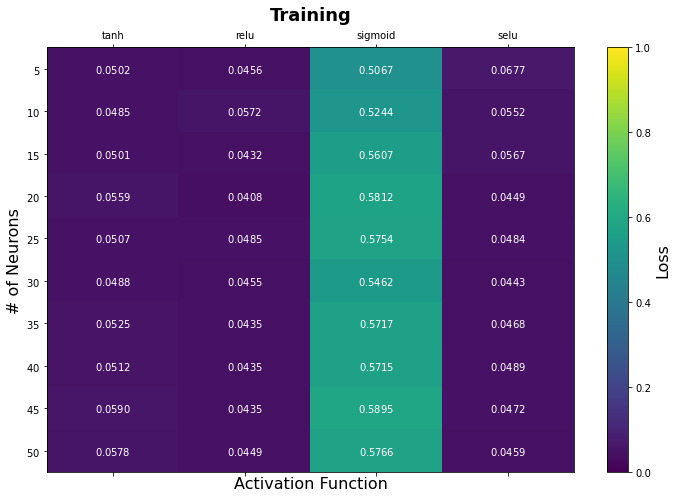

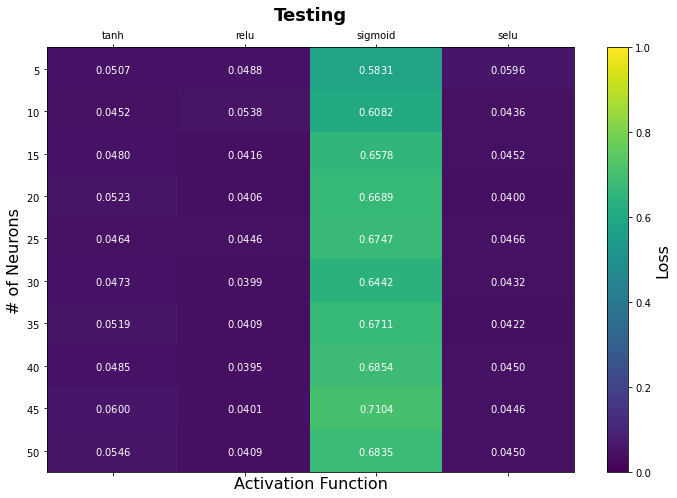

In [46]:
def plot_data_neur_activ(x,y,data,title=None):

    fontsize=16    
    fig, ax = plt.subplots(figsize = (10,7))
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1, 
                     aspect = "auto", cmap="viridis")
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('Loss',rotation=90,fontsize=fontsize)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.4f}$".format(data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center', 
                    color = "white"
                   )

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str("${0:.0f}$".format(i)) for i in y]
    
    ax.set_yticks(np.linspace(0,9,len(y)))
    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(y)
    
    ax.set_xlabel('Activation Function',fontsize=fontsize)
    ax.set_ylabel('# of Neurons',fontsize=fontsize)
    if title is not None:
        ax.set_title(title, fontsize=fontsize+2,fontweight='bold')

    plt.tight_layout()

    plt.show()

plot_data_neur_activ(activation,n_neuron,Train_loss, 'Training')
plot_data_neur_activ(activation,n_neuron,Test_loss, 'Testing')

Si vede come, a parte la funzione di attivazione sigmoide, i risultati non dipendano molto dalla funzione di attivazione scelta; allo stesso modo, sembra non dipendere molto dal numero di neuroni utilizzato. Mostro il risultato migliore ottenuto, che corrisponde alla funzione di attivazione *relu* e $n_{neurons}=40$, aumentando le epoche a $n_{epochs}=200$:

In [47]:
DNN_model = NN_model(1,n_layers,40,"relu",optimizer,loss)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta=0, patience=100, mode='auto')
best_history = DNN_model.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=200,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss = DNN_model.evaluate(x_train,y_train)[0]
test_loss =DNN_model.evaluate(x_valid,y_valid)[0]

Epoch 1/200
22/22 [==============================] - 0s 8ms/step - loss: 4.2529 - mse: 4.2529 - val_loss: 0.9234 - val_mse: 0.9234
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7453 - mse: 0.7453 - val_loss: 0.7413 - val_mse: 0.7413
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.6868 - val_mse: 0.6868
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5552 - mse: 0.5552 - val_loss: 0.6393 - val_mse: 0.6393
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5214 - mse: 0.5214 - val_loss: 0.6016 - val_mse: 0.6016
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.4960 - mse: 0.4960 - val_loss: 0.5641 - val_mse: 0.5641
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.4700 - mse: 0.4700 - val_loss: 0.5353 - val_mse: 0.5353
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.4468 - m

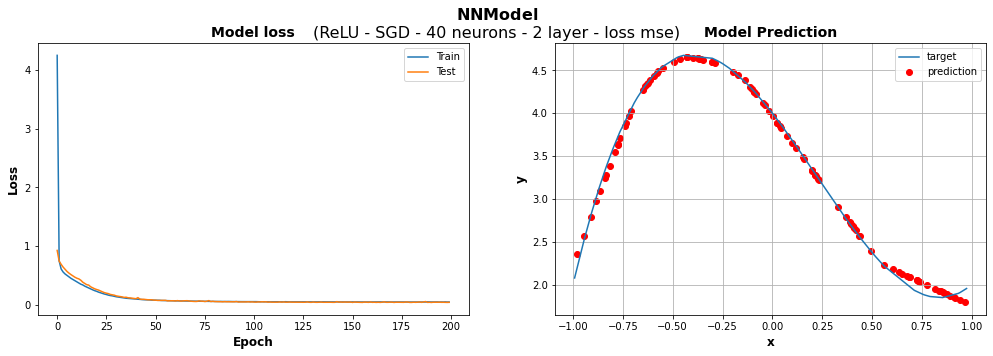

In [48]:
# look into training history
# Plot training & validation loss values

fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("$\mathbf{NN Model}$\n(ReLU - SGD - 40 neurons - 2 layer - loss mse)", fontsize=16)

ax[0].plot(best_history.history['loss'])
ax[0].plot(best_history.history['val_loss'])
ax[0].set_title('Model loss', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = DNN_model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label = "prediction")
ax[1].plot(x_valid, y_target, label = "target")
ax[1].legend()
ax[1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1].grid(True)
plt.show()

Le predizioni sono migliorate rispetto al caso con un unico strato nascosto.
Procedo con una grid search sulla funzione di costo (*mse*, *mae*, *mape*, *msle*) e sull'ottimizzatore (*sgd*,*adam*,*rmsprop*,*adagrad*,*adamax*):

In [49]:
# Define tunable parameters"
n_layers = 2                                  #Define number of hidden layers in the model
n_neuron = 40                                 #Define number of neurons per layer
epochs = 100                                  #Number of reiterations over the input data
activation = "relu"
loss = ["mse","mae","mape","msle"]
optimizer = ["sgd","adam","rmsprop","adagrad","adamax"]


history = []

Train_loss=np.zeros((len(loss),len(optimizer)))      #Define matrices to store accuracy scores as a function
Test_loss=np.zeros((len(loss),len(optimizer)))       #of n_epochs and number of hidden neurons for 

for i in range(len(loss)):     #run loops over hidden neurons and learning rates to calculate 
    row = []
    for j in range(len(optimizer)):      #accuracy scores 
        DNN_model=NN_model(1,n_layers,n_neuron,activation,optimizer[j],loss[i])
        earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

        row.append(DNN_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          callbacks=[earlystop]))
        
        Train_loss[i,j]=DNN_model.evaluate(x_train,y_train)[0]
        Test_loss[i,j]=DNN_model.evaluate(x_valid,y_valid)[0]
    history.append(row)

Epoch 1/100
22/22 [==============================] - 0s 7ms/step - loss: 5.4969 - mse: 5.4969 - val_loss: 1.0464 - val_mse: 1.0464
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7591 - mse: 0.7591 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7034 - val_mse: 0.7034
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.6302 - val_mse: 0.6302
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5218 - mse: 0.5218 - val_loss: 0.5854 - val_mse: 0.5854
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4802 - mse: 0.4802 - val_loss: 0.5624 - val_mse: 0.5624
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.5109 - val_mse: 0.5109
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4135 - m

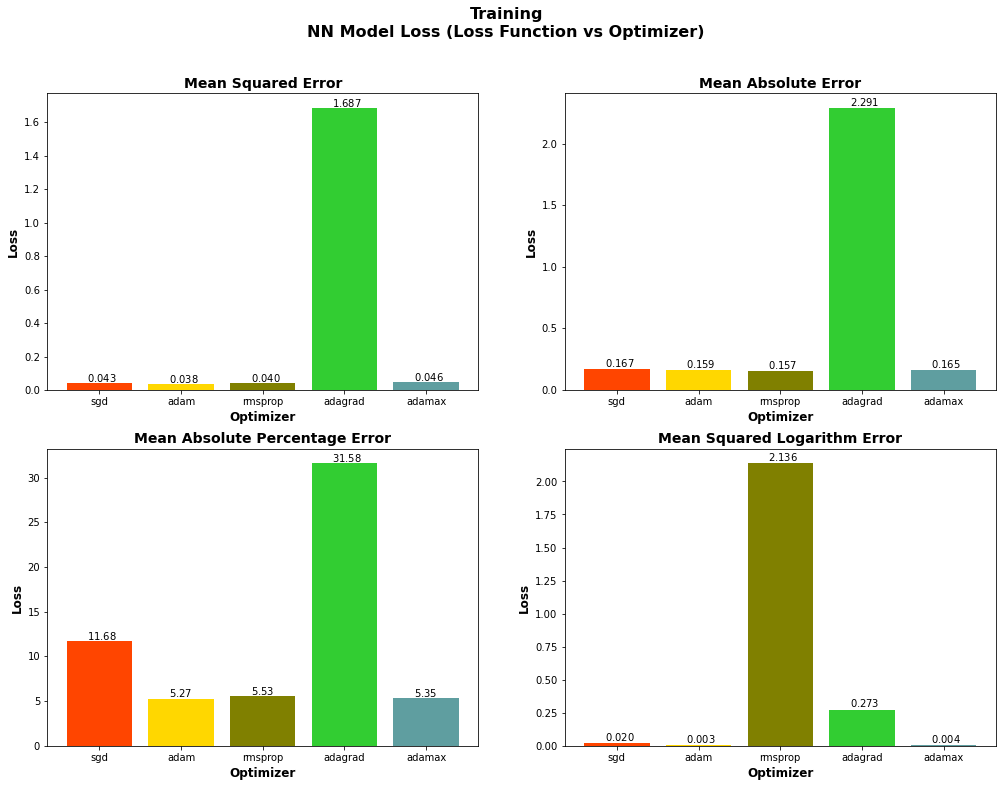

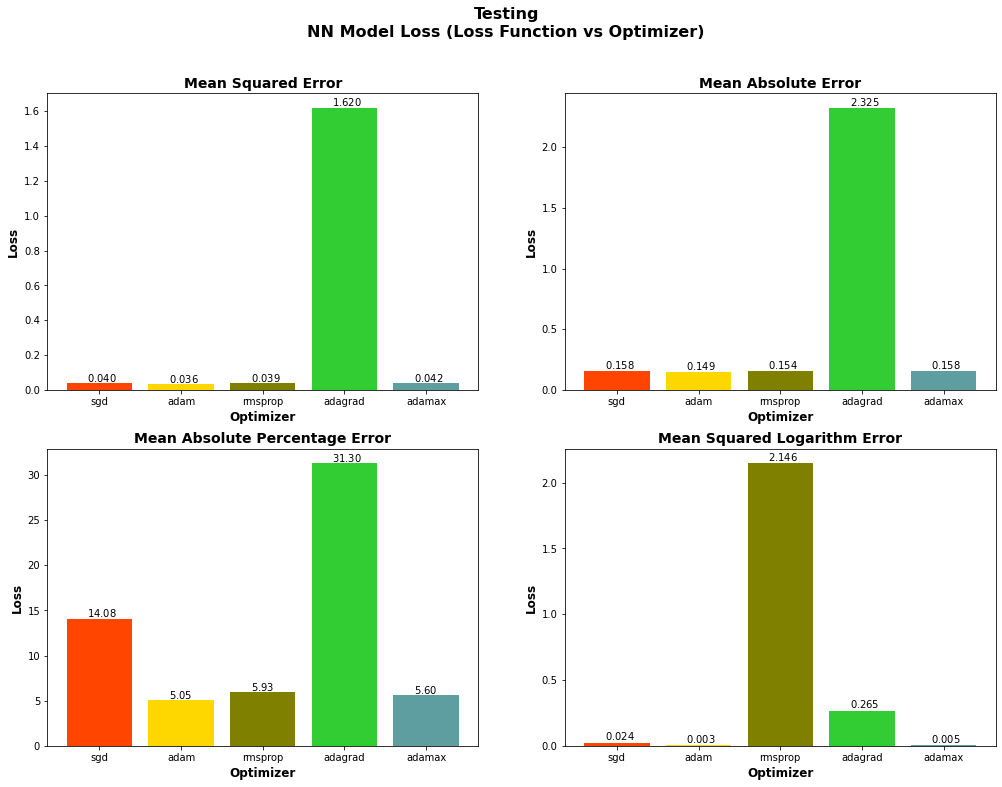

In [52]:
def plot_data_loss_optim(data,title=None):

    # plot results
    fontsize=16
    
    fig, ax = plt.subplots(2, 2, figsize=(17, 12))
    fig.suptitle(title+"\nNN Model Loss (Loss Function vs Optimizer)", fontsize=fontsize, fontweight = 'bold')
    
    colors = ["orangered","gold","olive","limegreen","cadetblue"]
    
    x = np.arange(len(optimizer))
    y = data[0]
    ax[0][0].set_xticklabels(['']+optimizer)
    ax[0][0].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[0][0].text( i-0.15,v + 0.03, str("${0:.3f}$".format(v)),va = "center", fontweight='bold')    
    y = data[1]    
    ax[0][1].set_xticklabels(['']+optimizer)
    ax[0][1].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[0][1].text( i-0.15,v + 0.05, str("${0:.3f}$".format(v)),va = "center", fontweight='bold')
    y = data[2]    
    ax[1][0].set_xticklabels(['']+optimizer)
    ax[1][0].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[1][0].text( i-0.15,v + 0.6, str("${0:.2f}$".format(v)),va = "center", fontweight='bold')
    y = data[3]    
    ax[1][1].set_xticklabels(['']+optimizer)
    ax[1][1].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[1][1].text( i-0.15,v + 0.05, str("${0:.3f}$".format(v)),va = "center", fontweight='bold')

    
    ax[0][0].set_title('Mean Squared Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[0][0].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[0][0].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    ax[0][1].set_title('Mean Absolute Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[0][1].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[0][1].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    ax[1][0].set_title('Mean Absolute Percentage Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[1][0].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[1][0].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    ax[1][1].set_title('Mean Squared Logarithm Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[1][1].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[1][1].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    plt.show()

plot_data_loss_optim(Train_loss, 'Training')
plot_data_loss_optim(Test_loss, 'Testing')

Confronto ora i migliori risultati ottenuti, aumentando il numero di epoche a $n_{epochs}=300$. Con ognuna delle funzioni di costo analizzate, l'ottimizzatore che ha dato i risultati migliori è stato *adam*.

In [53]:
DNN_model1 = NN_model(1,n_layers,40,"relu","adam","mse")
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta=0, patience=100, mode='auto')
best_history1 = DNN_model1.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss1 = DNN_model1.evaluate(x_train,y_train)[0]
test_loss1 =DNN_model1.evaluate(x_valid,y_valid)[0]

DNN_model2 = NN_model(1,n_layers,40,"relu","adam","mae")
best_history2 = DNN_model2.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss2 = DNN_model2.evaluate(x_train,y_train)[0]
test_loss2 =DNN_model2.evaluate(x_valid,y_valid)[0]

DNN_model3 = NN_model(1,n_layers,40,"relu","adam","mape")
best_history3 = DNN_model3.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss3 = DNN_model3.evaluate(x_train,y_train)[0]
test_loss3 =DNN_model3.evaluate(x_valid,y_valid)[0]

DNN_model4 = NN_model(1,n_layers,40,"relu","adam","msle")
best_history4 = DNN_model4.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss4 = DNN_model4.evaluate(x_train,y_train)[0]
test_loss4 =DNN_model4.evaluate(x_valid,y_valid)[0]

Epoch 1/300
22/22 [==============================] - 0s 7ms/step - loss: 11.2963 - mse: 11.2963 - val_loss: 9.9526 - val_mse: 9.9526
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 8.8274 - mse: 8.8274 - val_loss: 7.2529 - val_mse: 7.2529
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 5.9465 - mse: 5.9465 - val_loss: 4.1406 - val_mse: 4.1406
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 3.2238 - mse: 3.2238 - val_loss: 2.1243 - val_mse: 2.1243
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 1.8587 - mse: 1.8587 - val_loss: 1.6520 - val_mse: 1.6520
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 1.3938 - mse: 1.3938 - val_loss: 1.3905 - val_mse: 1.3905
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 1.1479 - mse: 1.1479 - val_loss: 1.1801 - val_mse: 1.1801
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 0.9355 -

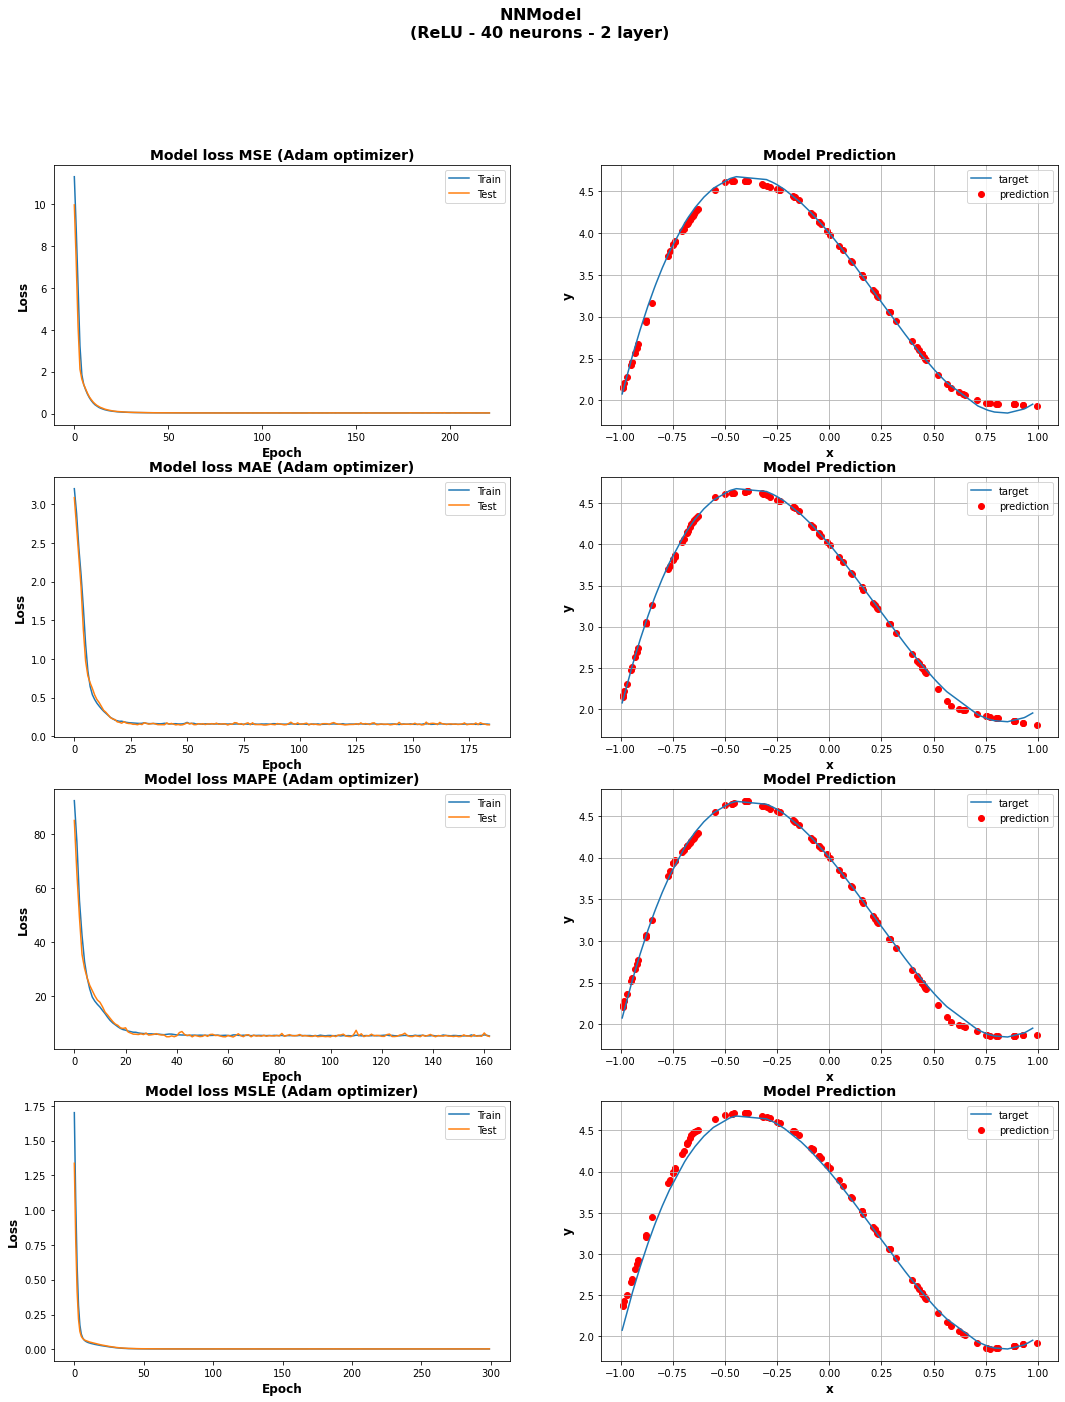

In [54]:
fig, ax = plt.subplots(4, 2, figsize=(18, 22))
fig.suptitle("$\mathbf{NN Model}$\n(ReLU - 40 neurons - 2 layer)", fontsize=16, fontweight = 'bold')



ax[0][0].plot(best_history1.history['loss'])
ax[0][0].plot(best_history1.history['val_loss'])
ax[0][0].set_title('Model loss MSE (Adam optimizer)', fontsize = 14, fontweight = 'bold')
ax[0][0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[0][0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0][0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = DNN_model1.predict(x_predicted)
ax[0][1].scatter(x_predicted, y_predicted,color='r', label = "prediction")
ax[0][1].plot(x_valid, y_target, label = "target")
ax[0][1].legend()
ax[0][1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[0][1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[0][1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[0][1].grid(True)


ax[1][0].plot(best_history2.history['loss'])
ax[1][0].plot(best_history2.history['val_loss'])
ax[1][0].set_title('Model loss MAE (Adam optimizer)', fontsize = 14, fontweight = 'bold')
ax[1][0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[1][0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[1][0].legend(['Train', 'Test'], loc='best')

y_predicted = DNN_model2.predict(x_predicted)
ax[1][1].scatter(x_predicted, y_predicted,color='r', label = "prediction")
ax[1][1].plot(x_valid, y_target, label = "target")
ax[1][1].legend()
ax[1][1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[1][1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1][1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1][1].grid(True)


ax[2][0].plot(best_history3.history['loss'])
ax[2][0].plot(best_history3.history['val_loss'])
ax[2][0].set_title('Model loss MAPE (Adam optimizer)', fontsize = 14, fontweight = 'bold')
ax[2][0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[2][0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[2][0].legend(['Train', 'Test'], loc='best')

y_predicted = DNN_model3.predict(x_predicted)
ax[2][1].scatter(x_predicted, y_predicted,color='r', label = "prediction")
ax[2][1].plot(x_valid, y_target, label = "target")
ax[2][1].legend()
ax[2][1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[2][1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[2][1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[2][1].grid(True)


ax[3][0].plot(best_history4.history['loss'])
ax[3][0].plot(best_history4.history['val_loss'])
ax[3][0].set_title('Model loss MSLE (Adam optimizer)', fontsize = 14, fontweight = 'bold')
ax[3][0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[3][0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[3][0].legend(['Train', 'Test'], loc='best')

y_predicted = DNN_model4.predict(x_predicted)
ax[3][1].scatter(x_predicted, y_predicted,color='r', label = "prediction")
ax[3][1].plot(x_valid, y_target, label = "target")
ax[3][1].legend()
ax[3][1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[3][1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[3][1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[3][1].grid(True)
plt.show()

Le previsioni sul range $x\in[-1,1]$ sono abbastanza buone per tutte e quattro i modelli mostrati.
Guardo le previsioni al di fuori del range su cui ho modellato la rete neurale.

In [55]:
x = np.random.uniform(-2, 2, 1000)
x.sort()
y = a * x**3 + b * x**2 + c * x + d # ideal (target) linear function

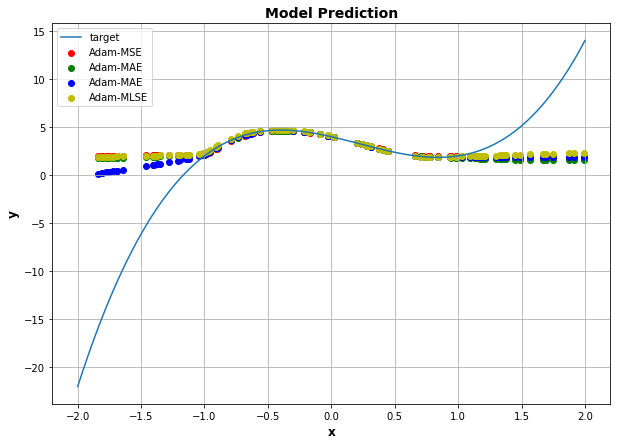

In [56]:
plt.figure(figsize=(10,7))
plt.plot(x, y, label='target')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = DNN_model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label='Adam-MSE')

y_predicted = DNN_model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='g', label='Adam-MAE')


y_predicted = DNN_model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='b', label='Adam-MAE')


y_predicted = DNN_model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='y', label='Adam-MLSE')



plt.title("Model Prediction", fontsize = 14, fontweight = 'bold')
plt.xlabel("x", fontsize = 12, fontweight = 'bold')
plt.ylabel("y", fontsize = 12, fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

Per quanto le previsioni nel range utilizzato per il training possano essere ritenute soddisfacenti, la stessa cosa non si può dire per le previsioni al di fuori del range considerato. Questo è un comportamento che posso aspettarmi da una rete neurale, infatti essa impara a rapportarsi con i dati forniti nel set di training, ma se applicata al di fuori del range fornito, non ha "regole" su cui basare le proprie previsioni.

Svolgo un'ultima analisi aggiungendo un ulteriore hidden layer:

In [57]:
# Define tunable parameters"
n_layers = 3                                  #Define number of hidden layers in the model
n_neuron = np.linspace(5,50,10)                #Define number of neurons per layer
epochs = 100                                  #Number of reiterations over the input data
activation = ["tanh","relu","sigmoid","selu"]
loss = "mse"
optimizer = "sgd"


history = []

Train_loss=np.zeros((len(n_neuron),len(activation)))      #Define matrices to store accuracy scores as a function
Test_loss=np.zeros((len(n_neuron),len(activation)))       #of n_epochs and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    row = []
    for j in range(len(activation)):      #accuracy scores 
        DNN_model=NN_model(1,n_layers,n_neuron[i],activation[j],optimizer,loss)
        earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

        row.append(DNN_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          callbacks=[earlystop]))
        
        Train_loss[i,j]=DNN_model.evaluate(x_train,y_train)[0]
        Test_loss[i,j]=DNN_model.evaluate(x_valid,y_valid)[0]
    history.append(row)

Epoch 1/100
22/22 [==============================] - 0s 8ms/step - loss: 3.1605 - mse: 3.1605 - val_loss: 1.0221 - val_mse: 1.0221
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.9004 - mse: 0.9004 - val_loss: 0.8555 - val_mse: 0.8555
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7222 - mse: 0.7222 - val_loss: 0.6583 - val_mse: 0.6583
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5246 - mse: 0.5246 - val_loss: 0.5006 - val_mse: 0.5006
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4123 - mse: 0.4123 - val_loss: 0.4533 - val_mse: 0.4533
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3853 - mse: 0.3853 - val_loss: 0.4523 - val_mse: 0.4523
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3780 - mse: 0.3780 - val_loss: 0.4433 - val_mse: 0.4433
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3755 - m

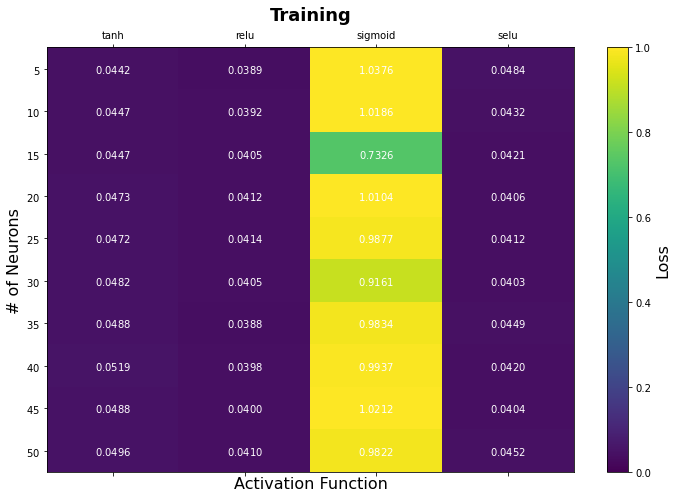

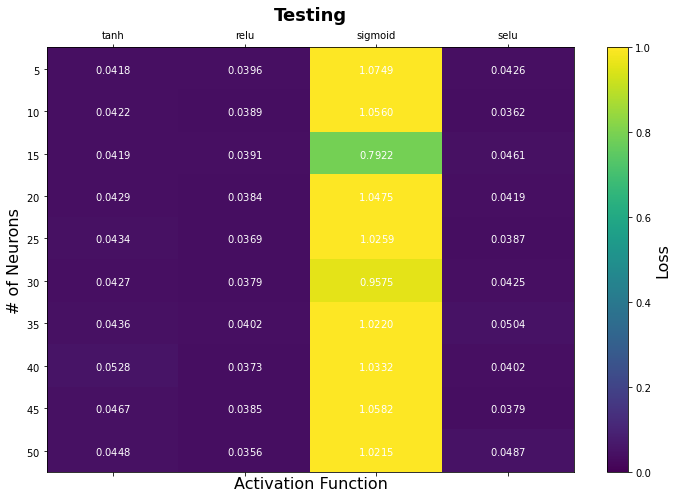

In [61]:
def plot_data_neur_activ(x,y,data,title=None):

    # plot results
    fontsize=16
    
    fig, ax = plt.subplots(figsize = (10,7))
    
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1, 
                     aspect = "auto", cmap="viridis")
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('Loss',rotation=90,fontsize=fontsize)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.4f}$".format(data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center', 
                    color = "white"
                   )

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str("${0:.0f}$".format(i)) for i in y]
    
    ax.set_yticks(np.linspace(0,9,len(y)))


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(y)

    
    
    ax.set_xlabel('Activation Function',fontsize=fontsize)
    ax.set_ylabel('# of Neurons',fontsize=fontsize)
    if title is not None:
        ax.set_title(title, fontsize=fontsize+2,fontweight='bold')

    plt.tight_layout()

    plt.show()

plot_data_neur_activ(activation,n_neuron,Train_loss, 'Training')
plot_data_neur_activ(activation,n_neuron,Test_loss, 'Testing')

Di nuovo, la funzione di costo non sembra dipendere molto dal numero di neuroni e dalla funzione di costo utilizzata (non considerando la sigmoide). Il minimo nel set di test è raggiunto utilizzando la *relu* e $n_{neurons}=50$.

In [62]:
DNN_model = NN_model(1,n_layers,50,"relu",optimizer,loss)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta=0, patience=100, mode='auto')
best_history = DNN_model.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=200,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss = DNN_model.evaluate(x_train,y_train)[0]
test_loss =DNN_model.evaluate(x_valid,y_valid)[0]

Epoch 1/200
22/22 [==============================] - 0s 7ms/step - loss: 5.3578 - mse: 5.3578 - val_loss: 1.1270 - val_mse: 1.1270
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8524 - mse: 0.8524 - val_loss: 0.7588 - val_mse: 0.7588
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6209 - mse: 0.6209 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5153 - mse: 0.5153 - val_loss: 0.5603 - val_mse: 0.5603
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.4451 - mse: 0.4451 - val_loss: 0.4914 - val_mse: 0.4914
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3927 - mse: 0.3927 - val_loss: 0.4597 - val_mse: 0.4597
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3495 - mse: 0.3495 - val_loss: 0.3829 - val_mse: 0.3829
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3075 - m

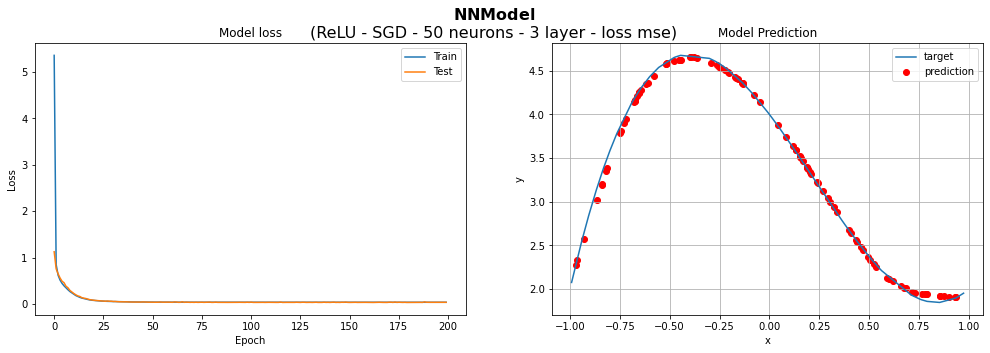

In [63]:
# look into training history
# Plot training & validation loss values

fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("$\mathbf{NN Model}$\n(ReLU - SGD - 50 neurons - 3 layer - loss mse)", fontsize=16)



ax[0].plot(best_history.history['loss'])
ax[0].plot(best_history.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = DNN_model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label = "prediction")
ax[1].plot(x_valid, y_target, label = "target")
ax[1].legend()
ax[1].set_title('Model Prediction')
ax[1].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].grid(True)
plt.show()

I risultati sembrano molto buoni: mantengo questi parametri e vario l'ottimizzatore e la funzione di costo.

In [64]:
# Define tunable parameters"
n_layers = 3                                  #Define number of hidden layers in the model
n_neuron = 50                                 #Define number of neurons per layer
epochs = 100                                  #Number of reiterations over the input data
activation = "relu"
loss = ["mse","mae","mape","msle"]
optimizer = ["sgd","adam","rmsprop","adagrad","adamax"]


history = []

Train_loss=np.zeros((len(loss),len(optimizer)))      #Define matrices to store accuracy scores as a function
Test_loss=np.zeros((len(loss),len(optimizer)))       #of n_epochs and number of hidden neurons for 

for i in range(len(loss)):     #run loops over hidden neurons and learning rates to calculate 
    row = []
    for j in range(len(optimizer)):      #accuracy scores 
        DNN_model=NN_model(1,n_layers,n_neuron,activation,optimizer[j],loss[i])
        earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

        row.append(DNN_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          callbacks=[earlystop]))
        
        Train_loss[i,j]=DNN_model.evaluate(x_train,y_train)[0]
        Test_loss[i,j]=DNN_model.evaluate(x_valid,y_valid)[0]
    history.append(row)

Epoch 1/100
22/22 [==============================] - 0s 7ms/step - loss: 5.3016 - mse: 5.3016 - val_loss: 0.9919 - val_mse: 0.9919
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7317 - mse: 0.7317 - val_loss: 0.6957 - val_mse: 0.6957
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.5992 - val_mse: 0.5992
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4845 - mse: 0.4845 - val_loss: 0.5656 - val_mse: 0.5656
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4432 - mse: 0.4432 - val_loss: 0.5041 - val_mse: 0.5041
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4076 - mse: 0.4076 - val_loss: 0.4616 - val_mse: 0.4616
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3734 - mse: 0.3734 - val_loss: 0.4267 - val_mse: 0.4267
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3493 - m

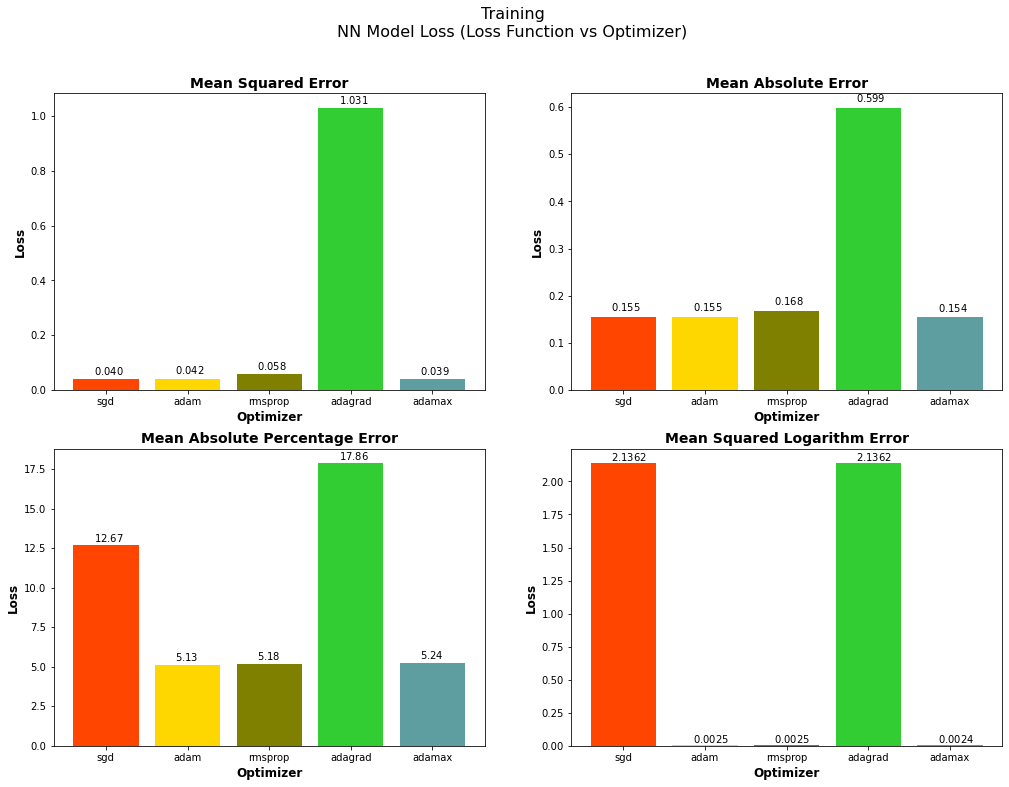

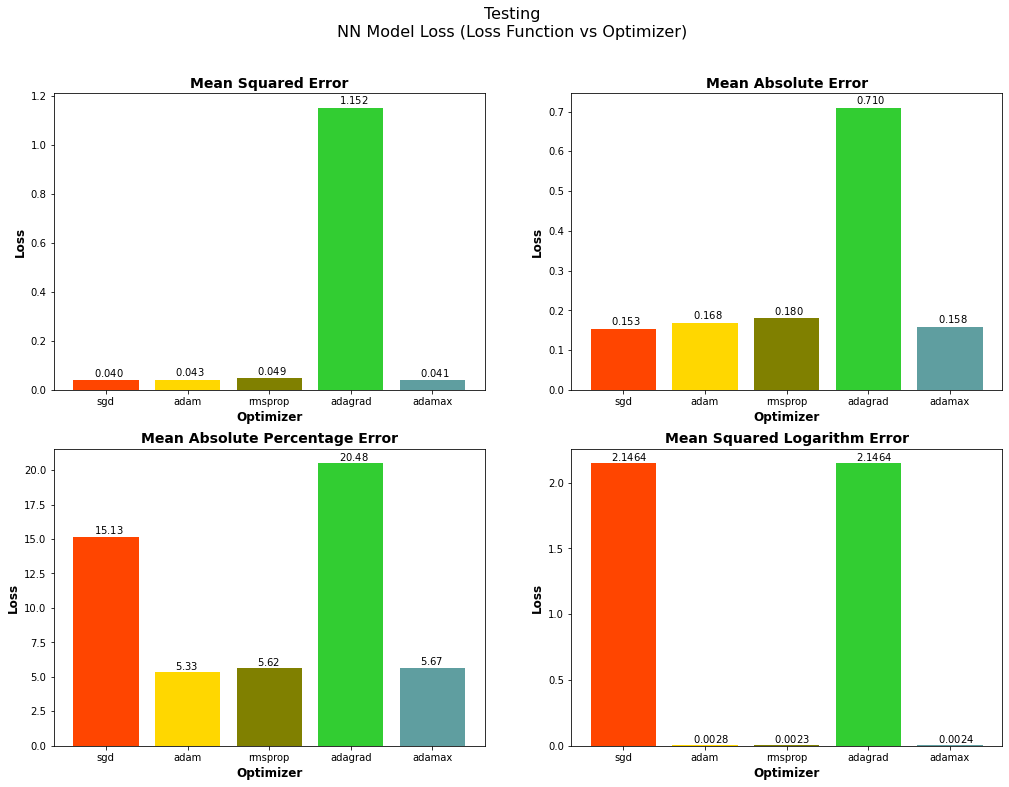

In [67]:
def plot_data_loss_optim(data,title=None):

    # plot results
    fontsize=16
    
    fig, ax = plt.subplots(2, 2, figsize=(17, 12))
    fig.suptitle(title+"\nNN Model Loss (Loss Function vs Optimizer)", fontsize=fontsize)
    
    colors = ["orangered","gold","olive","limegreen","cadetblue"]
    
    x = np.arange(len(optimizer))
    y = data[0]
    ax[0][0].set_xticklabels(['']+optimizer)
    ax[0][0].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[0][0].text( i-0.15,v + 0.03, str("${0:.3f}$".format(v)),va = "center", fontweight='bold')    
    y = data[1]    
    ax[0][1].set_xticklabels(['']+optimizer)
    ax[0][1].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[0][1].text( i-0.15,v + 0.02, str("${0:.3f}$".format(v)),va = "center", fontweight='bold')
    y = data[2]    
    ax[1][0].set_xticklabels(['']+optimizer)
    ax[1][0].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[1][0].text( i-0.15,v + 0.5, str("${0:.2f}$".format(v)),va = "center", fontweight='bold')
    y = data[3]    
    ax[1][1].set_xticklabels(['']+optimizer)
    ax[1][1].bar(x, y, color=colors)
    for i, v in enumerate(y):
        ax[1][1].text( i-0.15,v + 0.05, str("${0:.4f}$".format(v)),va = "center", fontweight='bold')

    
    ax[0][0].set_title('Mean Squared Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[0][0].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[0][0].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    ax[0][1].set_title('Mean Absolute Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[0][1].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[0][1].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    ax[1][0].set_title('Mean Absolute Percentage Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[1][0].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[1][0].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    ax[1][1].set_title('Mean Squared Logarithm Error', fontsize = fontsize - 2, fontweight = 'bold')
    ax[1][1].set_ylabel('Loss', fontsize = fontsize - 4, fontweight = 'bold')
    ax[1][1].set_xlabel('Optimizer', fontsize = fontsize - 4, fontweight = 'bold')
    
    
    
    
    
    plt.show()

plot_data_loss_optim(Train_loss, 'Training')
plot_data_loss_optim(Test_loss, 'Testing')

Confronto ora i migliori risultati ottenuti, aumentando il numero di epoche a $n_{epochs}=300$:

In [78]:
DNN_model1 = NN_model(1,n_layers,50,"relu","sgd","mse")
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta=0, patience=100, mode='auto')
best_history1 = DNN_model1.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss1 = DNN_model1.evaluate(x_train,y_train)[0]
test_loss1 =DNN_model1.evaluate(x_valid,y_valid)[0]

DNN_model2 = NN_model(1,n_layers,50,"relu","sgd","mae")
best_history2 = DNN_model2.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss2 = DNN_model2.evaluate(x_train,y_train)[0]
test_loss2 =DNN_model2.evaluate(x_valid,y_valid)[0]

DNN_model3 = NN_model(1,n_layers,50,"relu","adam","mape")
best_history3 = DNN_model3.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss3 = DNN_model3.evaluate(x_train,y_train)[0]
test_loss3 =DNN_model3.evaluate(x_valid,y_valid)[0]

DNN_model4 = NN_model(1,n_layers,50,"relu","rmsprop","msle")
best_history4 = DNN_model4.fit(x=x_train, y=y_train, 
                         batch_size=32, epochs=300,
                         shuffle=True, # a good idea is to shuffle input before at each epoch
                         validation_data=(x_valid, y_valid),
                         callbacks=[earlystop])
train_loss4 = DNN_model4.evaluate(x_train,y_train)[0]
test_loss4 =DNN_model4.evaluate(x_valid,y_valid)[0]

Epoch 1/300
22/22 [==============================] - 0s 12ms/step - loss: 5.0300 - mse: 5.0300 - val_loss: 1.1743 - val_mse: 1.1743
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 0.8902 - mse: 0.8902 - val_loss: 0.7872 - val_mse: 0.7872
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6363 - mse: 0.6363 - val_loss: 0.6490 - val_mse: 0.6490
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5381 - mse: 0.5381 - val_loss: 0.5945 - val_mse: 0.5945
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4657 - mse: 0.4657 - val_loss: 0.5497 - val_mse: 0.5497
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4179 - mse: 0.4179 - val_loss: 0.4680 - val_mse: 0.4680
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 0.3797 - mse: 0.3797 - val_loss: 0.4255 - val_mse: 0.4255
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 0.3475 - 

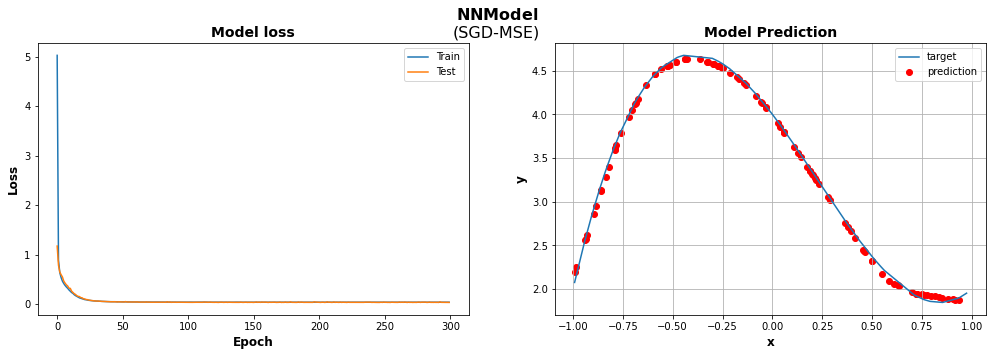

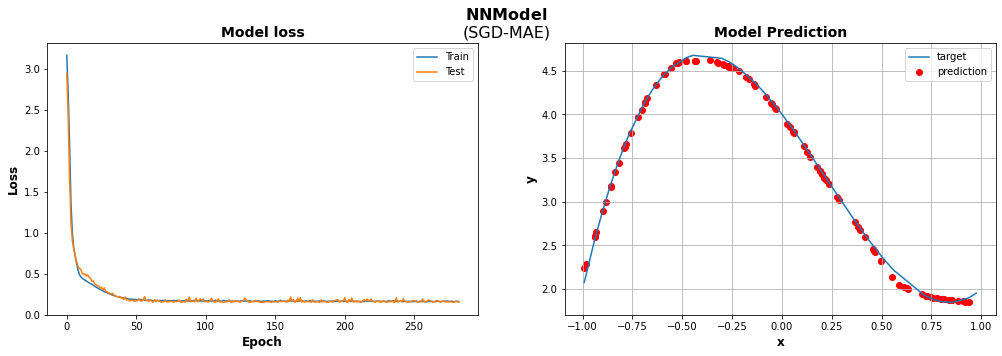

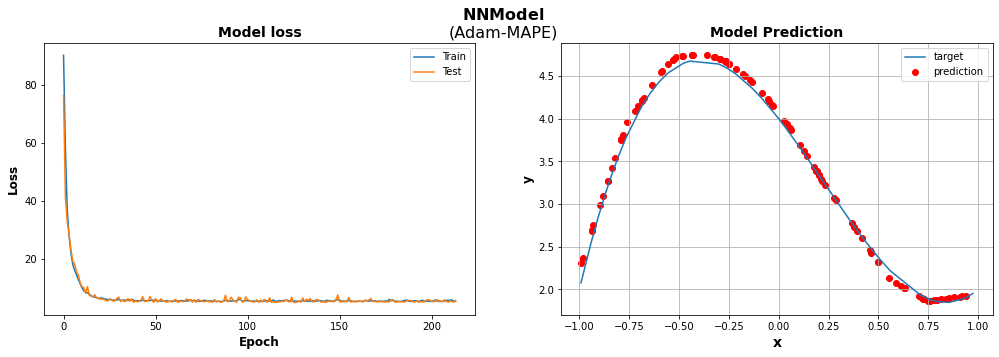

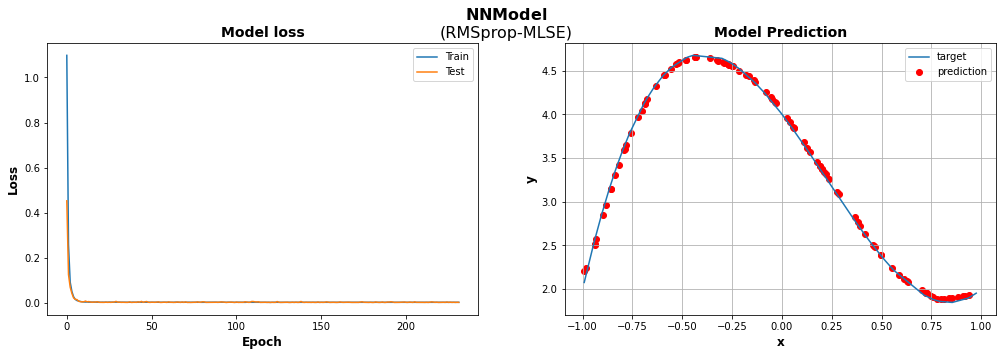

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("$\mathbf{NN Model}$\n(SGD-MSE)", fontsize=16)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted1 = DNN_model1.predict(x_predicted)
y_predicted2 = DNN_model2.predict(x_predicted)
y_predicted3 = DNN_model3.predict(x_predicted)
y_predicted4 = DNN_model4.predict(x_predicted)



ax[0].plot(best_history1.history['loss'])
ax[0].plot(best_history1.history['val_loss'])
ax[0].set_title('Model loss', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].plot(x_valid, y_target, label = "target")
ax[1].scatter(x_predicted, y_predicted1,color='r', label = "prediction")


ax[1].legend()
ax[1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1].grid(True)

fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("$\mathbf{NN Model}$\n(SGD-MAE)", fontsize=16)

ax[0].plot(best_history2.history['loss'])
ax[0].plot(best_history2.history['val_loss'])
ax[0].set_title('Model loss', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].scatter(x_predicted, y_predicted2,color='r', label = "prediction")
ax[1].plot(x_valid, y_target, label = "target")
ax[1].legend()
ax[1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1].grid(True)

fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("$\mathbf{NN Model}$\n(Adam-MAPE)", fontsize=16)


ax[0].plot(best_history3.history['loss'])
ax[0].plot(best_history3.history['val_loss'])
ax[0].set_title('Model loss', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].scatter(x_predicted, y_predicted3,color='r', label = "prediction")
ax[1].plot(x_valid, y_target, label = "target")
ax[1].legend()
ax[1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel('x', fontsize = 14, fontweight = 'bold')
ax[1].grid(True)

fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("$\mathbf{NN Model}$\n(RMSprop-MLSE)", fontsize=16)


ax[0].plot(best_history4.history['loss'])
ax[0].plot(best_history4.history['val_loss'])
ax[0].set_title('Model loss', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].scatter(x_predicted, y_predicted4,color='r', label = "prediction")
ax[1].plot(x_valid, y_target, label = "target")
ax[1].legend()
ax[1].set_title('Model Prediction', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1].grid(True)
plt.show()

Guardo le previsioni al di fuori del range su cui ho modellato la rete neurale:

In [70]:
x = np.random.uniform(-2, 2, 1000)
x.sort()
y = a * x**3 + b * x**2 + c * x + d # ideal (target) linear function

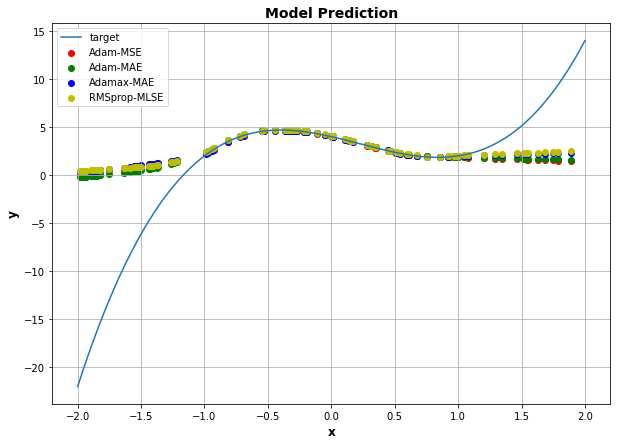

In [71]:
plt.figure(figsize=(10,7))
plt.plot(x, y, label='target')

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = DNN_model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label='Adam-MSE')

y_predicted = DNN_model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='g', label='Adam-MAE')


y_predicted = DNN_model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='b', label='Adamax-MAE')


y_predicted = DNN_model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='y', label='RMSprop-MLSE')



plt.title("Model Prediction", fontsize = 14, fontweight = 'bold')
plt.xlabel("x", fontsize = 12, fontweight = 'bold')
plt.ylabel("y", fontsize = 12, fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

Anche in questo caso, le previsioni al di fuori del range su cui la rete neurale è stata trainata non sono affatto soddisfacenti.